### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


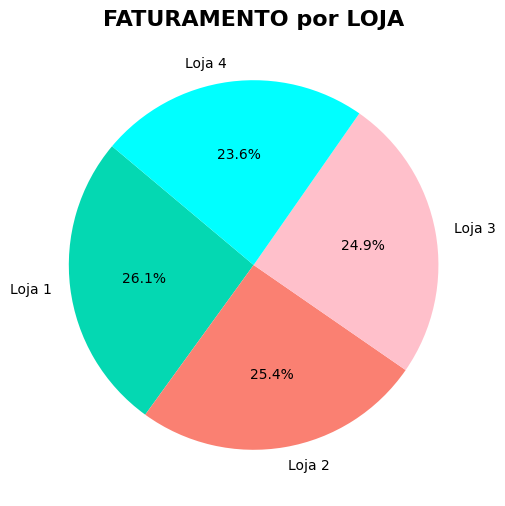

In [9]:
import matplotlib.pyplot as plt

todos_faturamentos = [faturamento_loja, faturamento_loja2 , faturamento_loja3, faturamento_loja4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Paleta de cores pastel
cores_personalizadas = ["#04D8B2", "#FA8072", "#FFC0CB", "#00FFFF"]

# Define o tamanho da figura (quadrado para centralizar melhor)
plt.figure(figsize=(6, 6))

# Gráfico de pizza
plt.pie(
    todos_faturamentos,
    labels=lojas,
    colors=cores_personalizadas,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("FATURAMENTO por LOJA", fontsize=16, weight='bold')
plt.show()

In [10]:
faturamento_total = faturamento_loja + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"FATURAMENTO TOTAL: {faturamento_total:,.2f}")

FATURAMENTO TOTAL: 5,871,490.79


# 2. Vendas por Categoria


In [22]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Agrupando e contando registros por categoria com groupby() e .size()
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Une as tabelas, preenche com zeros e converte para inteiros
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


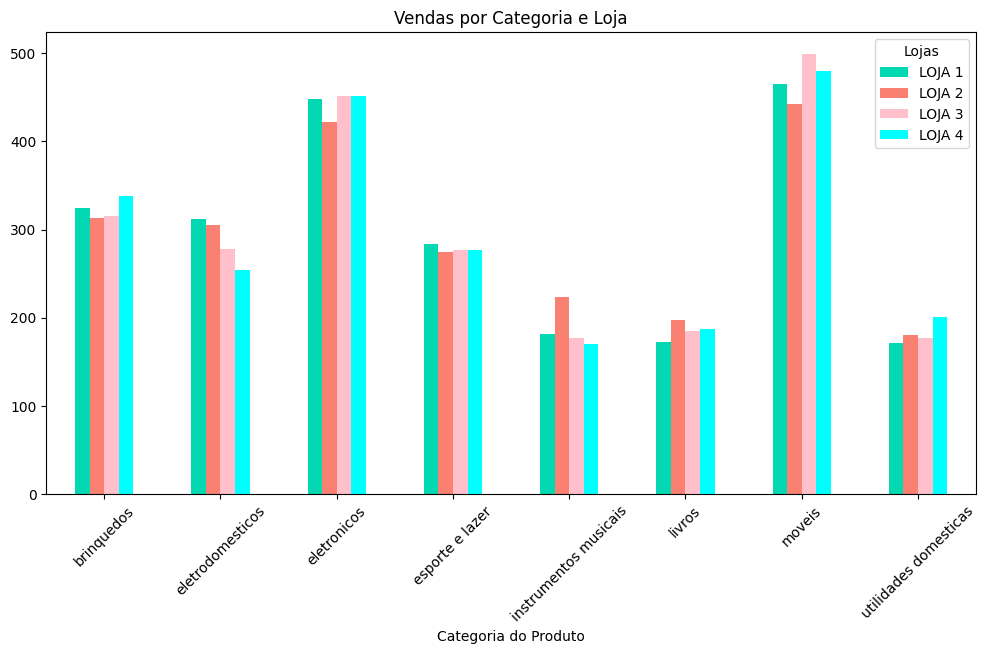

In [13]:
dados = {
    "Categoria do Produto": [
        "brinquedos", "eletrodomesticos", "eletronicos", "esporte e lazer",
        "instrumentos musicais", "livros", "moveis", "utilidades domesticas"
    ],
    "LOJA 1": [324, 312, 448, 284, 182, 173, 465, 171],
    "LOJA 2": [313, 305, 422, 275, 224, 197, 442, 181],
    "LOJA 3": [315, 278, 451, 277, 177, 185, 499, 177],
    "LOJA 4": [338, 254, 451, 277, 170, 187, 480, 201],
}

# Cores personalizadas
cores_personalizadas = ["#04D8B2", "#FA8072", "#FFC0CB", "#00FFFF"]

# Criando o DataFrame
df = pd.DataFrame(dados)
df.set_index("Categoria do Produto", inplace=True)

# Plotando o gráfico com cores personalizadas
ax = df.plot(kind='bar', figsize=(12, 6), color=cores_personalizadas)

# Personalizando o gráfico
plt.title("Vendas por Categoria e Loja")
plt.xticks(rotation=45)
plt.legend(title="Lojas")

# Exibindo o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

In [14]:
# Criando uma lista de DataFrames e os nomes das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a média de avaliação da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Convertendo o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])

# Exibindo a tabela final
print(tabela_medias)

        Média de Avaliações
Loja               3.976685
Loja 2             4.037304
Loja 3             4.048326
Loja 4             3.995759


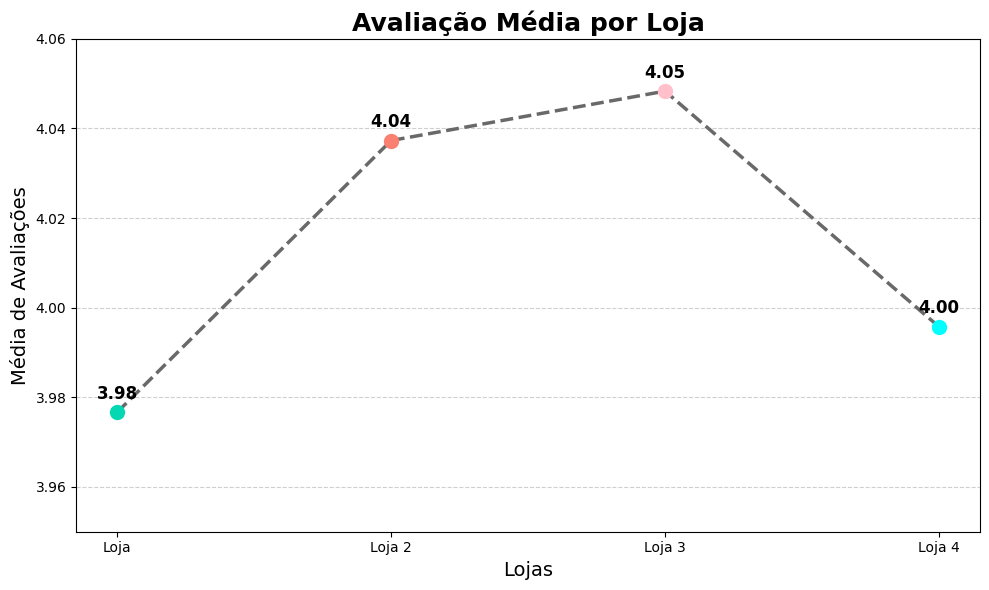

In [15]:
# Dados
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.976685, 4.037304, 4.048326, 3.995759]

# Cores para os pontos
cores = ["#04D8B2", "#FA8072", "#FFC0CB", "#00FFFF"]
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(lojas)):
    plt.scatter(lojas[i], medias[i], color=cores[i], s=100, zorder=3)
    plt.text(lojas[i], medias[i] + 0.003, f"{medias[i]:.2f}", ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [16]:
produto_mais1 = loja["Produto"].value_counts()
produto_mais2 = loja2["Produto"].value_counts()
produto_mais3 = loja3["Produto"].value_counts()
produto_mais4 = loja4["Produto"].value_counts()

resultado = f"""PRODUTOS MAIS E MENOS VENDIDOS:

- Loja 1 - Produto mais vendido: {produto_mais1.index[0]}
           Produto menos vendido: {produto_mais1.index[-1]}

- Loja 2 - Produto mais vendido: {produto_mais2.index[0]}
           Produto menos vendido: {produto_mais2.index[-1]}

- Loja 3 - Produto mais vendido: {produto_mais3.index[0]}
           Produto menos vendido: {produto_mais3.index[-1]}

- Loja 4 - Produto mais vendido: {produto_mais4.index[0]}
           Produto menos vendido: {produto_mais4.index[-1]}"""

print(resultado)

PRODUTOS MAIS E MENOS VENDIDOS:

- Loja 1 - Produto mais vendido: Micro-ondas
           Produto menos vendido: Celular ABXY

- Loja 2 - Produto mais vendido: Iniciando em programação
           Produto menos vendido: Jogo de tabuleiro

- Loja 3 - Produto mais vendido: Kit banquetas
           Produto menos vendido: Blocos de montar

- Loja 4 - Produto mais vendido: Cama box
           Produto menos vendido: Guitarra


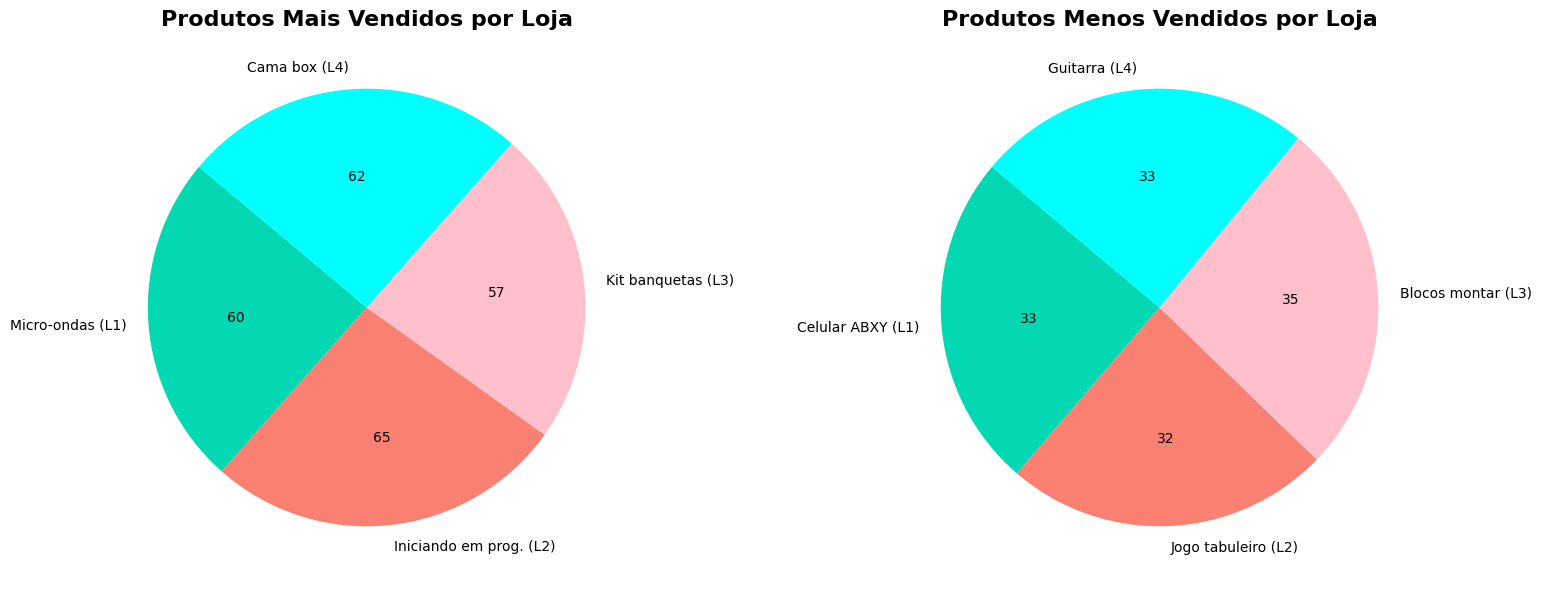

In [18]:
import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Celular ABXY (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_padronizadas = ["#04D8B2", "#FA8072", "#FFC0CB", "#00FFFF"]

# Função para exibir valores absolutos nas fatias da pizza
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

# Criar figura maior para mais espaçamento
plt.figure(figsize=(16, 6))

# Gráfico - Produtos Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Mais Vendidos por Loja', fontsize=16, fontweight='bold')

# Gráfico - Produtos Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')

# Espaço horizontal entre os gráficos
plt.subplots_adjust(wspace=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [19]:
from collections import Counter

avaliacao = Counter(loja['Frete'].tolist())
avaliacao = Counter(loja2['Frete'].tolist())
avaliacao = Counter(loja3['Frete'].tolist())
avaliacao = Counter(loja4['Frete'].tolist())

def media_frete(loja):
  fretes = loja['Frete'].tolist()
  return sum(fretes) / len(fretes) if fretes else 0

print(f'Média de frete da Loja 01:  {media_frete(loja):.2f}')
print(f'Média de frete da Loja 02:  {media_frete(loja2):.2f}')
print(f'Média de frete da Loja 03:  {media_frete(loja3):.2f}')
print(f'Média de frete da Loja 04:  {media_frete(loja4):.2f}')

Média de frete da Loja 01:  34.69
Média de frete da Loja 02:  33.62
Média de frete da Loja 03:  33.07
Média de frete da Loja 04:  31.28


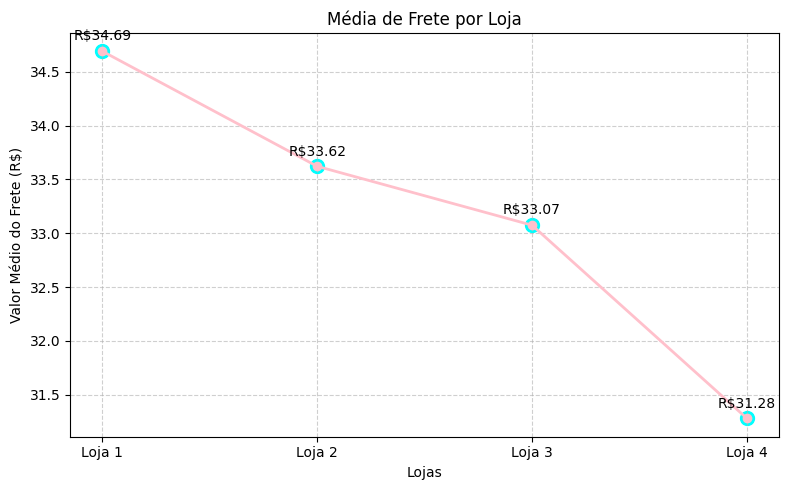

In [21]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

medias = [media_frete(loja), media_frete(loja2),
          media_frete(loja3), media_frete(loja4)]

# Gráfico de área
plt.figure(figsize=(8, 5))
plt.scatter(lojas, medias, color="#00FFFF", s=100)
#plt.fill_between(lojas, medias, color='skyblue', alpha=0.5)
plt.plot(lojas, medias, marker='o', color="#FFC0CB", linewidth=2)

plt.title('Média de Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(True, linestyle='--', alpha=0.6)

# Mostra os valores no gráfico
for i, media in enumerate(medias):
    plt.text(lojas[i], media + 0.1, f'R${media:.2f}', ha='center')

plt.tight_layout()
plt.show()

## Relatório Final

Objetivo:
Analisar o desempenho de quatro lojas com base em faturamento, volume de vendas por categoria, avaliações dos clientes, produtos mais e menos vendidos e média de frete. O objetivo é identificar qual loja apresenta o desempenho mais fraco para embasar uma possível decisão de venda ou descontinuidade da operação.

Observação: A Loja 4 apresenta o menor faturamento, ficando aproximadamente 9,8% abaixo da Loja 1 (maior faturamento).

Análise: Apesar de alguns bons desempenhos pontuais (como em brinquedos e utilidades), a Loja 4 tem os menores números em eletrodomésticos e instrumentos musicais, o que pode indicar fragilidade em categorias de alto valor.

Análise: A Loja 4 tem avaliação razoável, mas abaixo das Lojas 2 e 3. A Loja 3 tem a melhor média de satisfação.

Análise: O produto menos vendido da Loja 4 (Guitarra) está alinhado com o menor volume em instrumentos musicais, reforçando uma fraqueza nesse setor.

Análise: A Loja 4 tem o frete mais baixo, o que pode ser positivo para o consumidor. Porém, isso não está refletindo diretamente em um faturamento mais alto ou desempenho geral.

Com base nos dados analisados, a Loja 4 apresenta o pior desempenho geral, conforme evidenciado por:

Menor faturamento entre as quatro lojas. Desempenho mais fraco em categorias importantes como eletrodomésticos e instrumentos musicais. Avaliação média inferior à de outras lojas. Apesar do frete mais barato, isso não compensou o fraco desempenho nas vendas.

Recomendação: Considerar a venda ou encerramento da Loja 4, direcionando os recursos e estratégias para as unidades com maior desempenho e melhor retorno financeiro.